# 積分

In [1]:
from sympy import *
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

init_printing()

# シンボル定義
x,y,z = symbols('x,y,z')

## 区分求積法のための基本的な関数

In [3]:
def scatter_integral_body(num_data, is_left, f, param):
    # 描画領域の指定
    fig = plt.figure(figsize=(param["figsize_x"], param["figsize_y"]))
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xlim(param["x_min"], param["x_max"])
    subplot.set_ylim(param["y_min"], param["y_max"])
    linex = np.linspace(param["x_min"], param["x_max"], num_data)

    # 参考: グラフを折れ線で描く. 折れ線近似の様子を見たい場合に使う.
    #subplot.plot(linex, f(linex), color='blue')

    # 長方形の描画と面積の近似値計算
    area = 0
    step = (param["x_max"] - param["x_min"]) / num_data
    for x0 in np.arange(param["x_min"], param["x_max"], step):
        x = x0 if is_left else x0 + step
        rect = plt.Rectangle((x0, 0), step, f(x), alpha=param["alpha"])
        subplot.add_patch(rect)
        area += step * f(x)

    subplot.text(param["text_x"], param["text_y"], ('area = %f' % area))

    # 関数と三角関数の描画：上の supplot の処理の後に置かないと上の長方形が描かれない
    vf = np.vectorize(f)

    xs = np.linspace(param["x_min"], param["x_max"], num_max)
    ys = vf(xs)
    plt.plot(xs, ys, color="red")
    plt.clf()

# 定積分（区分求積法）のイメージ

## $f(x) = x^2$ を上下から近似

次の定積分を計算する。
比較用の厳密な値は `SymPy` 先生に計算してもらっておく。

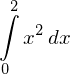

In [3]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x**2, (x, 0, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [11]:
def scatter(num_data, is_left):
    def f(x):
        return x**2

    param = {
        "x_min": 0.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 4.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": 0.2,
        "text_y": 3.0,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## 例：三角形

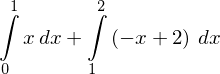

In [5]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x, (x, 0, 1)) + Integral(2-x, (x, 1, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [4]:
def scatter(num_data, is_left):
    def f(x):
        return x if x <=1 else 2-x

    param = {
        "x_min": 0.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 2.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": 0.2,
        "text_y": 1.5,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## 例：三角関数

絶対値が噛んでいると `doit()` で厳密な値を出してくれないらしい。
きちんと調べていないが、たぶん関数にもよる。

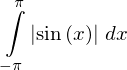

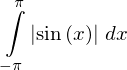

In [62]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(Abs(sin(x)), (x, - pi, pi))
display(d)
display(d.doit())
display(d.doit().evalf())

手で分割すれば大丈夫。

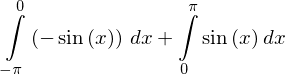

In [2]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(-sin(x), (x, - pi, 0)) + Integral(sin(x), (x, 0, pi))
display(d)
display(d.doit())
display(d.doit().evalf())

比較のために絶対値を外してみた。

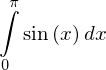

In [65]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(sin(x), (x, 0, pi))
display(d)
display(d.doit())
display(d.doit().evalf())

### numpy での描画

In [12]:
x_min = 0.0
x_max = 1.0 * np.pi
y_max = 1.0
def scatter(num_data, is_left):
    def f(x):
        return abs(np.sin(x))

    param = {
        "x_min": -1.0 * np.pi,
        "x_max": 1.0 * np.pi,
        "y_min": 0.0,
        "y_max": 1.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -2,
        "text_y": 0.5,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 100
interact(scatter, num_data=(2, num_max, 1) is_left=True)

interactive(children=(IntSlider(value=51, description='num_data', min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## 3次関数

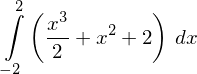

In [49]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x**3 / 2 + x**2 + 2, (x, -2, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [15]:
def scatter(num_data, is_left):
    def f(x):
        return x**3 / 2 + x**2 + 2

    param = {
        "x_min": -2.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 12.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -1.5,
        "text_y": 8,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## 4 次関数

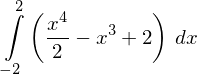

In [66]:
from sympy import Integral, Symbol
x = Symbol('x')
d = Integral(x**4 / 2 - x**3 + 2, (x, -2, 2))
display(d)
display(d.doit())
display(d.doit().evalf())

In [16]:
def scatter(num_data, is_left):
    def f(x):
        return x**4 / 2 - x**3 + 2

    param = {
        "x_min": -2.0,
        "x_max": 2.0,
        "y_min": 0.0,
        "y_max": 20.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -1.5,
        "text_y": 8,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 100
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

interactive(children=(IntSlider(value=51, description='num_data', min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## 円

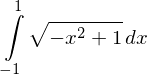

In [21]:
from sympy import Integral, Symbol
import math
x = Symbol('x', real=True)
d = Integral(sqrt(1 - x**2), (x, -1, 1)) # この sqrt は SymPy の 関数
display(d)
display(d.doit())
display(d.doit().evalf())

interactive(children=(IntSlider(value=26, description='num_data', max=50, min=2), Checkbox(value=True, description='is_left'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

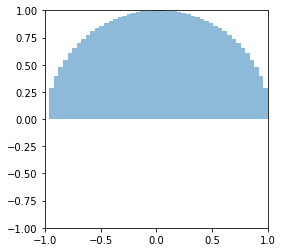

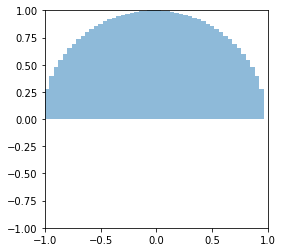

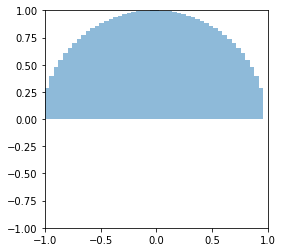

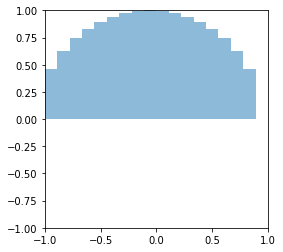

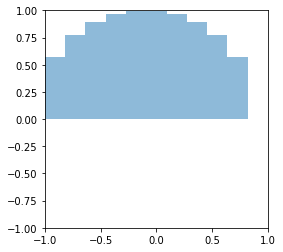

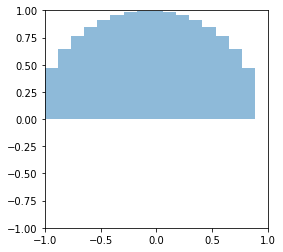

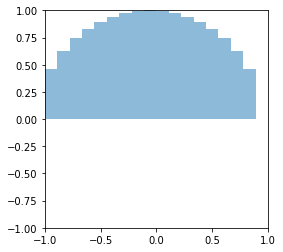

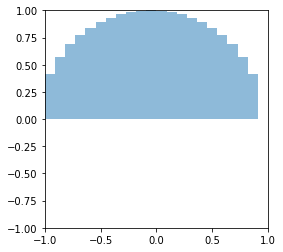

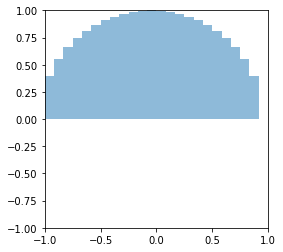

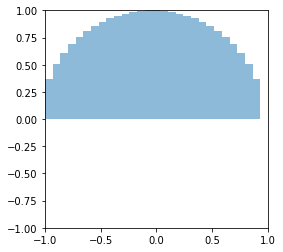

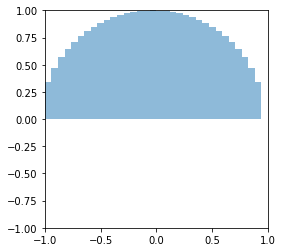

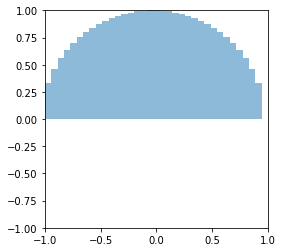

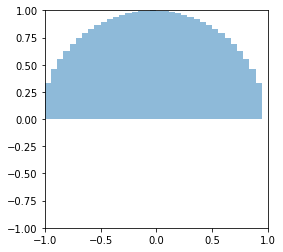

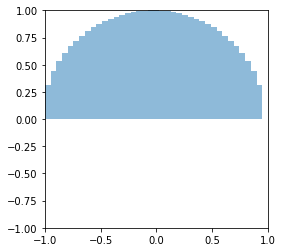

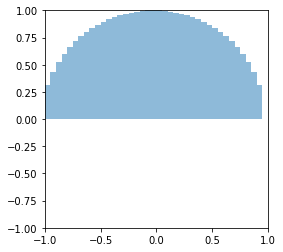

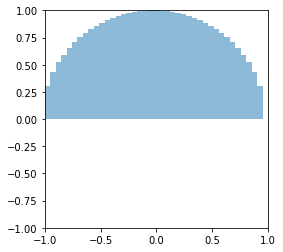

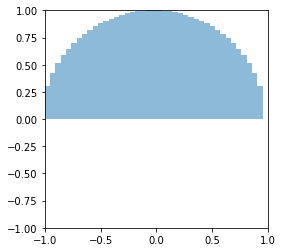

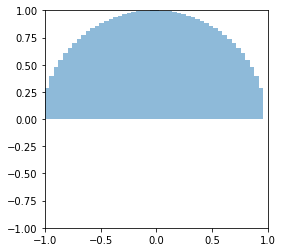

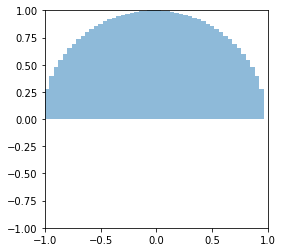

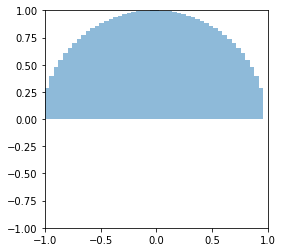

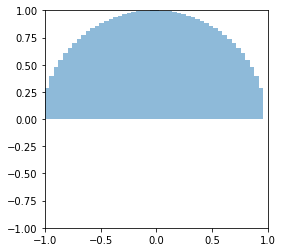

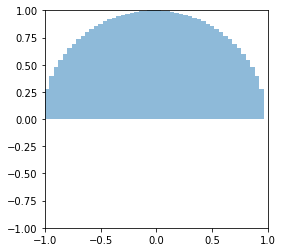

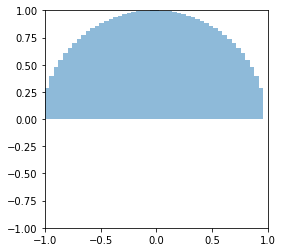

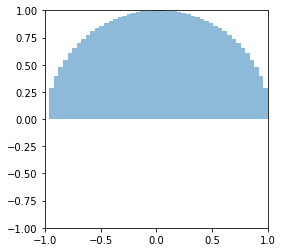

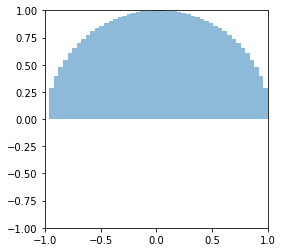

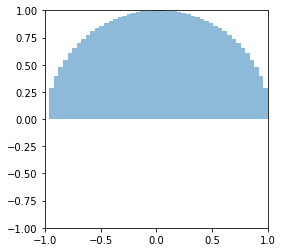

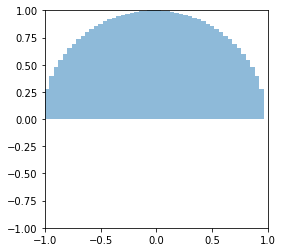

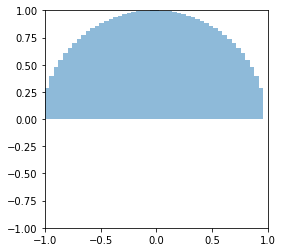

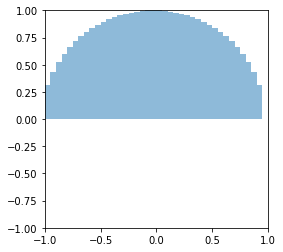

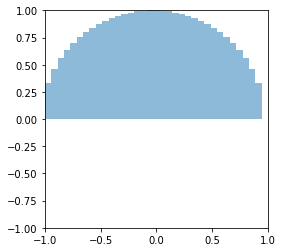

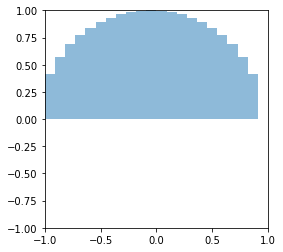

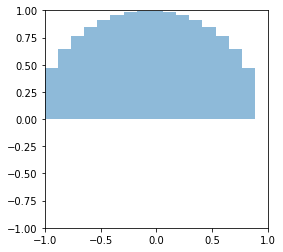

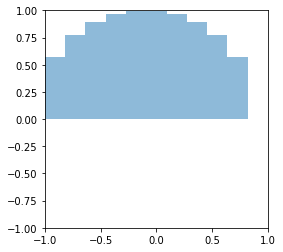

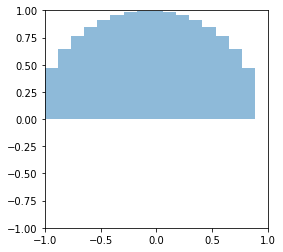

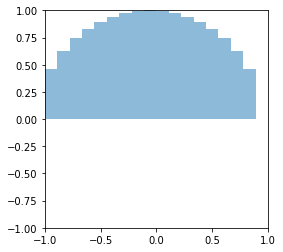

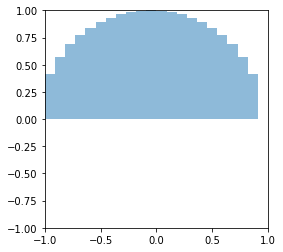

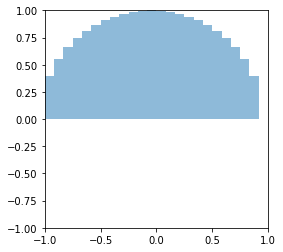

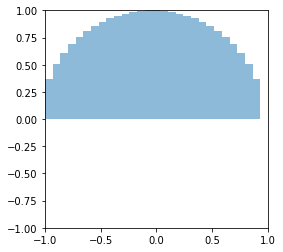

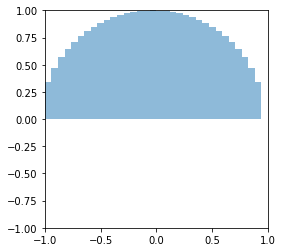

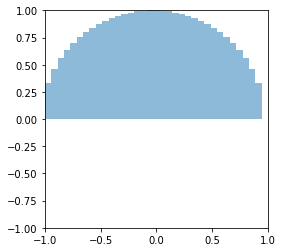

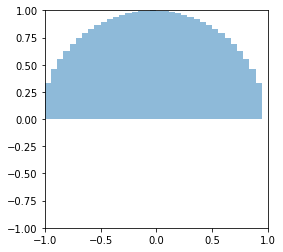

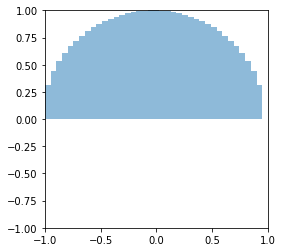

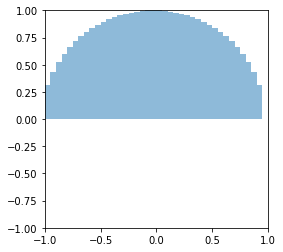

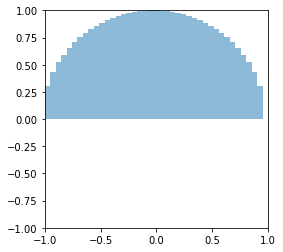

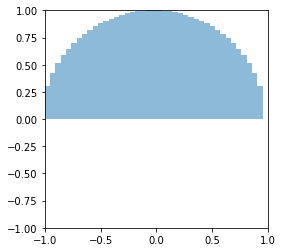

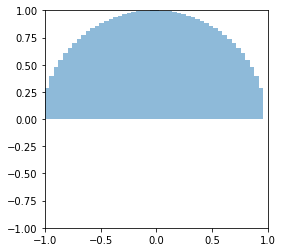

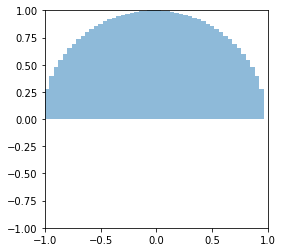

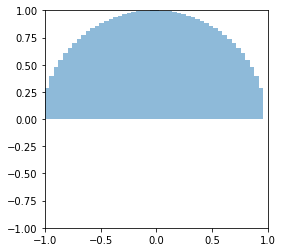

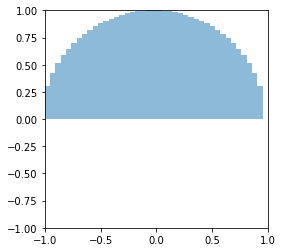

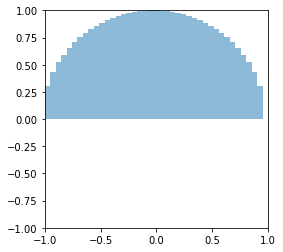

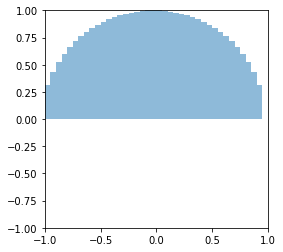

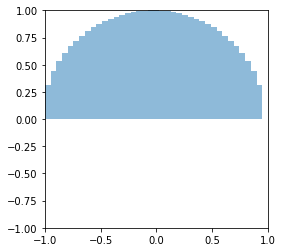

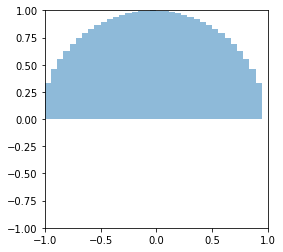

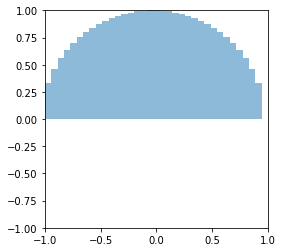

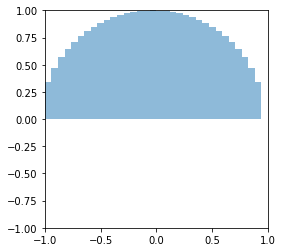

In [26]:
import math

def scatter(num_data, is_left):
    def f(x):
        return math.sqrt(1 - x**2)

    param = {
        "x_min": -1.0,
        "x_max": 1.0,
        "y_min": -1.0,
        "y_max": 1.0,
        "figsize_x": 4,
        "figsize_y": 4,
        "alpha": 0.5,
        "text_x": -0.5,
        "text_y": 0.5,
    }
    scatter_integral_body(num_data, is_left, f, param)

num_max = 50
interact(scatter, num_data=(2, num_max, 1), value=1, is_left=True)

# 微分

## 微分描画のための基本的な関数

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def scatter_differential_body(x, f, param):
    # 描画領域の指定
    fig = plt.figure(figsize=(param["figsize_x"], param["figsize_y"]))
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xlim(param["x_min"], param["x_max"])
    subplot.set_ylim(param["y_min"], param["y_max"])

    # 接点の x 座標：いちいち書くのが面倒なのでエイリアス
    x0 = param["tan_pt_x"]
    # 接線の傾き
    slope = (f(x) - f(x0)) / (x - x0) if x != x0 else param["dc"]

    # 接線の関数
    def tan_line(x):
        return f(x0) + slope * (x - x0)

    # 傾きを描画
    subplot.text(param["text_x"], param["text_y"], ('slope = %f' % slope))

    # 接点と動点の描画
    subplot.scatter([x0, x], [f(x0), f(x)])

    # 接線の描画
    subplot.plot([-3, 3], [tan_line(-3), tan_line(3)], linewidth=1, color='red')
    
    # 関数 f の描画
    vf = np.vectorize(f)
    xs = np.linspace(param["x_min"], param["x_max"], num_max)
    ys = vf(xs)
    subplot.plot(xse, ys, color="gray")

## 2 次関数
$f(x) = x^2 + 3$ で接点は $(1,1)$,
接点での微分係数は $2$.

In [59]:
f = x**2 + 3
fdash = diff(f, x)

display(f)
display(fdash)
display(fdash.subs([(x, 1)]))

In [60]:
def scatter(x):
    def f(x):
        return x**2 + 3

    param = {
        "x_min": -3.0,
        "x_max": 3.0,
        "y_min": 0.0,
        "y_max": 12.0,
        "figsize_x": 5,
        "figsize_y": 5,
        "alpha": 0.5,
        "text_x": -1.5,
        "text_y": 8,
        "tan_pt_x": 1.0,
        "tan_pt_y": f(1.0),
        "dc": 2, # 接点での微分係数
        "num_max": 50
    }
    scatter_differential_body(x, f, param)

interact(scatter, x=(-3, 3, 0.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-3.0), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## 3 次関数

In [61]:
f = x**3 - 2 * x**2 + 3
fdash = diff(f, x)

display(f)
display(fdash)
display(fdash.subs([(x, 1)]))

In [1]:
def scatter(x):
    def f(x):
        return 0.5 * x**3 - x**2 + 3

    param = {
        "x_min": -3.0,
        "x_max": 3.0,
        "y_min": -12.0,
        "y_max": 12.0,
        "figsize_x": 5,
        "figsize_y": 5,
        "alpha": 0.5,
        "text_x": -1.5,
        "text_y": 8,
        "tan_pt_x": 1.0,
        "tan_pt_y": f(1.0),
        "dc": -1, # 接点での微分係数
        "num_max": 50
    }
    scatter_differential_body(x, f, param)

interact(scatter, x=(-3, 3, 0.1))

NameError: name 'interact' is not defined